In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('diamonds.csv')

In [72]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head()
#cut, color and clarity seem like categorical attributes

,carat,cut,color,clarity,depth,table,price,x,y,z
27300,2.21,Very Good,I,SI1,62.9,59.0,17784,8.30,8.34,5.23
48234,0.70,Ideal,J,SI1,60.1,59.0,1949,5.79,5.75,3.47
7511,0.61,Ideal,D,VVS1,62.1,56.0,4241,5.43,5.46,3.38
20043,0.40,Ideal,H,SI2,62.6,55.0,625,4.73,4.76,2.97
24415,1.51,Premium,E,SI1,58.6,62.0,12655,7.58,7.53,4.43


In [73]:
data.info()
#from observation we can see that there are no empty attributes
#hence we won't have to worry about the working strategies to tackle them

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 27300 to 39470
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [74]:
data["cut"].value_counts()
#cut indeed is categorical

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [75]:
data["color"].value_counts()
#color is also categorical

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [76]:
data["clarity"].value_counts()
#clarity is also categorical

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [77]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [78]:
data = data.sample(frac=1)
X = data.drop(["price"], axis = 1)
y = data["price"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 42)

In [79]:
X_train.head(3)

,carat,cut,color,clarity,depth,table,x,y,z
41499,0.58,Premium,J,VS2,59.5,62.0,5.44,5.41,3.23
17424,1.08,Premium,G,VS1,62.9,55.0,6.60,6.53,4.13
30252,0.34,Very Good,F,VVS2,59.6,60.0,4.54,4.59,2.72


In [80]:
y_train.head(3)

41499    1233
17424    6982
30252     724
Name: price, dtype: int64

In [81]:
X_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [82]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37758 entries, 41499 to 32997
Data columns (total 9 columns):
carat      37758 non-null float64
cut        37758 non-null object
color      37758 non-null object
clarity    37758 non-null object
depth      37758 non-null float64
table      37758 non-null float64
x          37758 non-null float64
y          37758 non-null float64
z          37758 non-null float64
dtypes: float64(6), object(3)
memory usage: 2.9+ MB


In [83]:
from sklearn.base import BaseEstimator, TransformerMixin

class DFSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

cat_attributes = ['cut','color','clarity']
num_attributes = list(X_train.drop(cat_attributes,axis=1))

num_pipeline = Pipeline([
    ('selector', DFSelector(num_attributes)),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', DFSelector(cat_attributes)),
    ('encoder', OneHotEncoder(sparse=False))
])

In [85]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])


In [86]:
X_train_prepared = full_pipeline.fit_transform(X_train,y_train)

In [87]:
sample = X_train_prepared[0]
sample

array([-0.45908001, -1.57357116,  2.03004049, -0.25791682, -0.28146909,
       -0.43480851,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ])

# Decision Tree Regressor

In [88]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_prepared, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [89]:
from sklearn.metrics import mean_squared_error
import numpy as np

predictions = tree_reg.predict(X_train_prepared)
lin_mse = mean_squared_error(y_train, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

5.789928029994

In [70]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train_prepared, y_train, scoring = "neg_mean_squared_error", cv=10)

In [91]:
np.sqrt(-scores).mean()

47.17992330878976

In [222]:
np.sqrt(-scores).std()

25.067763893079217

In [223]:
data["price"].max()

18823

In [224]:
X_test_prepared = full_pipeline.fit_transform(X_test,y_test)
pred = tree_reg.predict(X_test_prepared)

In [225]:

diff = pd.DataFrame(data = pred)
diff.columns = ['Predicted']

In [226]:
diff.head(5) 

,Predicted
0,1069.0
1,4398.0
2,1612.0
3,868.0
4,2515.0


In [227]:
diff["Actual"] = y_test.values
percent_diff = ((abs(diff["Predicted"]-diff["Actual"])/diff["Actual"])*100).mean()
percent_arr = (abs(diff["Predicted"]-diff["Actual"])/diff["Actual"])*100

per_5 = 0
for x in percent_arr:
    if(x<=5):
        per_5 = per_5+1
        
print('percent predictions with less than 5% deviation from actual value= ',(per_5/len(percent_arr))*100)

per_10 = 0
for x in percent_arr:
    if(x<=10):
        per_10 = per_10+1
        
print('percent predictions with less than 10% deviation from actual value= ',(per_10/len(percent_arr))*100)


print('percent error on average= ',percent_diff)
#the predicted and actual values differ by apprx 9.42%
#this looks pretty bad, only 43% of the predictions had an error of less than 5%
#we will try some other regressor to tackle this issue

percent predictions with less than 5% deviation from actual value=  43.86355209492028
percent predictions with less than 10% deviation from actual value=  65.48634285008033
percent error on average=  9.424920208716228


In [228]:
pred

array([1069., 4398., 1612., ...,  895., 6333., 1746.])

In [229]:
y_test.values

array([ 951, 4327, 1709, ...,  958, 6220, 1637], dtype=int64)

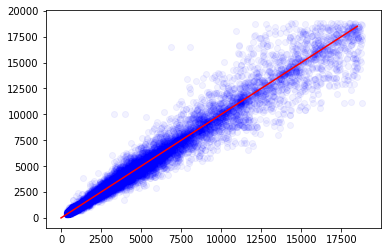

In [230]:
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0,18500,1000)
leng = len(y_test)
plt.plot(t,t,c='red')
plt.scatter(y_test.values, pred, alpha=0.05,c='blue')
plt.show()

# SVM Regressor

In [241]:
#now we will try the SVC Regressor
from sklearn import svm

clf = svm.SVR(kernel='linear')
clf.fit(X_train_prepared, y_train.values)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [242]:
clf.score(X_test_prepared, y_test.values)
#svm gave accuracy of ~85% on test dataset

0.8578374913793396

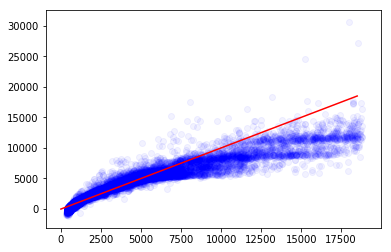

In [243]:
pred_svm = clf.predict(X_test_prepared) 

t = np.linspace(0,18500,1000)
leng = len(y_test)
plt.plot(t,t,c='red')
plt.scatter(y_test.values, pred_svm, alpha=0.05,c='blue')
plt.show() 

In [244]:
diff_svm = pd.DataFrame(data = pred_svm)
diff_svm.columns = ['Predicted']

diff_svm["Actual"] = y_test.values
percent_diff_svm = ((abs(diff_svm["Predicted"]-diff_svm["Actual"])/diff_svm["Actual"])*100).mean()
percent_arr = (abs(diff_svm["Predicted"]-diff_svm["Actual"])/diff_svm["Actual"])*100

per_5 = 0
for x in percent_arr:
    if(x<=5):
        per_5 = per_5+1
        
print('percent predictions with less than 5% deviation from actual value= ',(per_5/len(percent_arr))*100)

per_10 = 0
for x in percent_arr:
    if(x<=10):
        per_10 = per_10+1
        
print('percent predictions with less than 10% deviation from actual value= ',(per_10/len(percent_arr))*100)


print('percent error on average= ',percent_diff_svm)

percent predictions with less than 5% deviation from actual value=  15.671734025460388
percent predictions with less than 10% deviation from actual value=  30.7254974663206
percent error on average=  24.91820182284104
